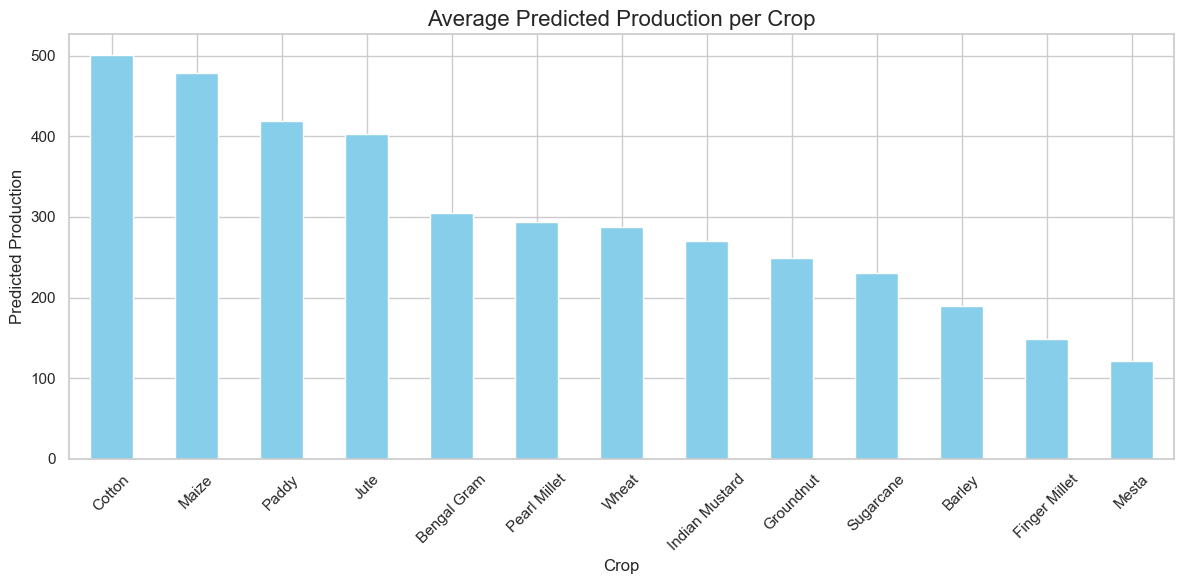

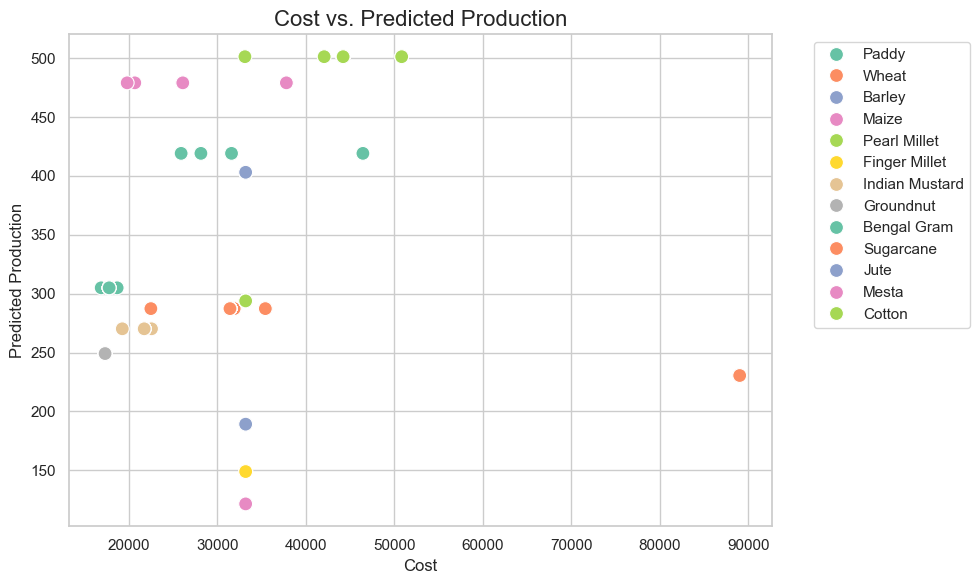

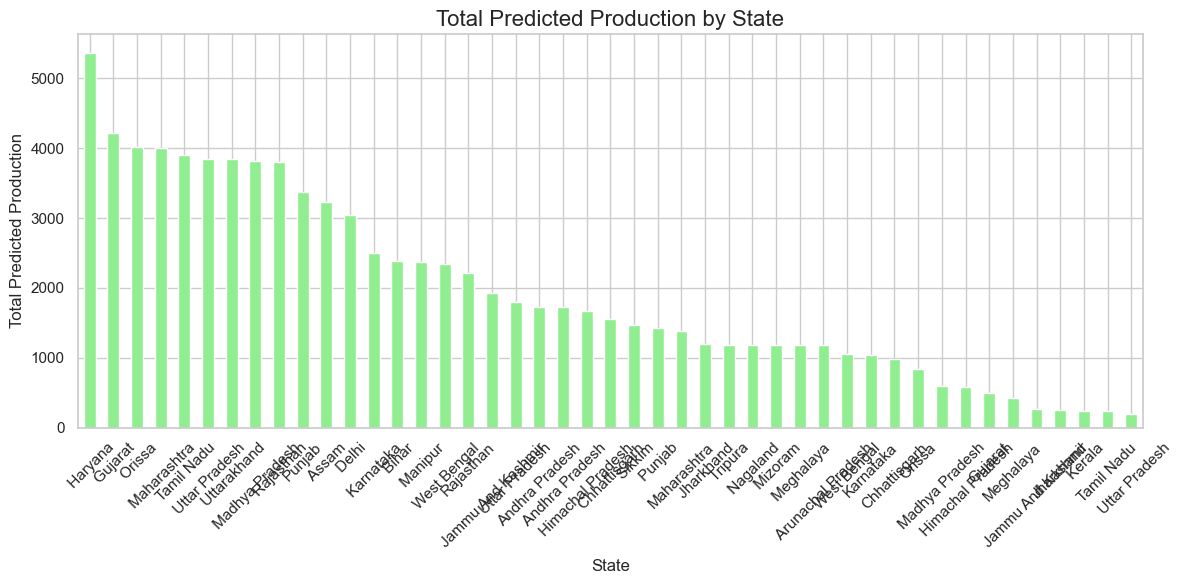

C:\Users\NAME\AppData\Local\Temp\ipykernel_30024\920232150.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Duration in days', y='Quantity', data=data, palette='coolwarm')


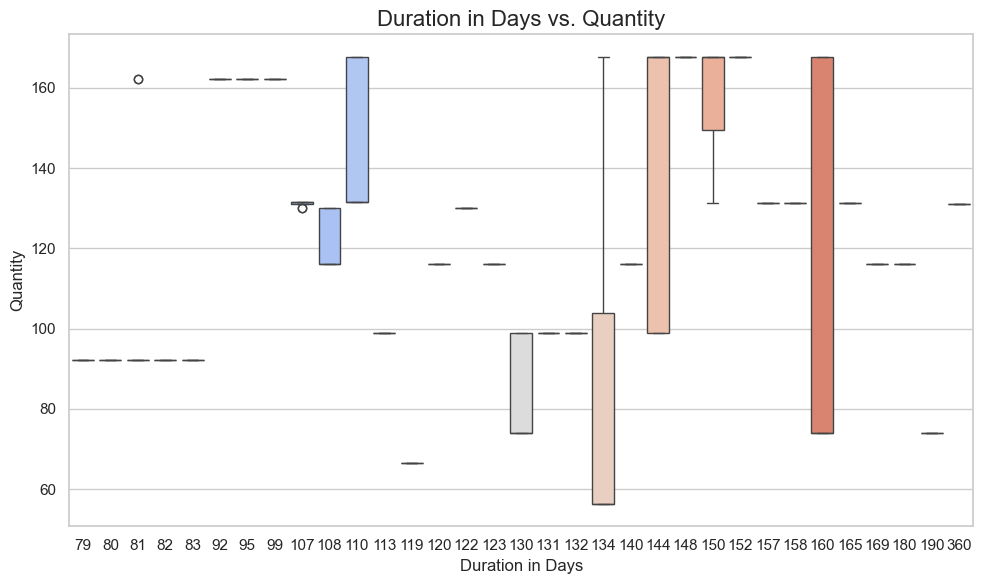

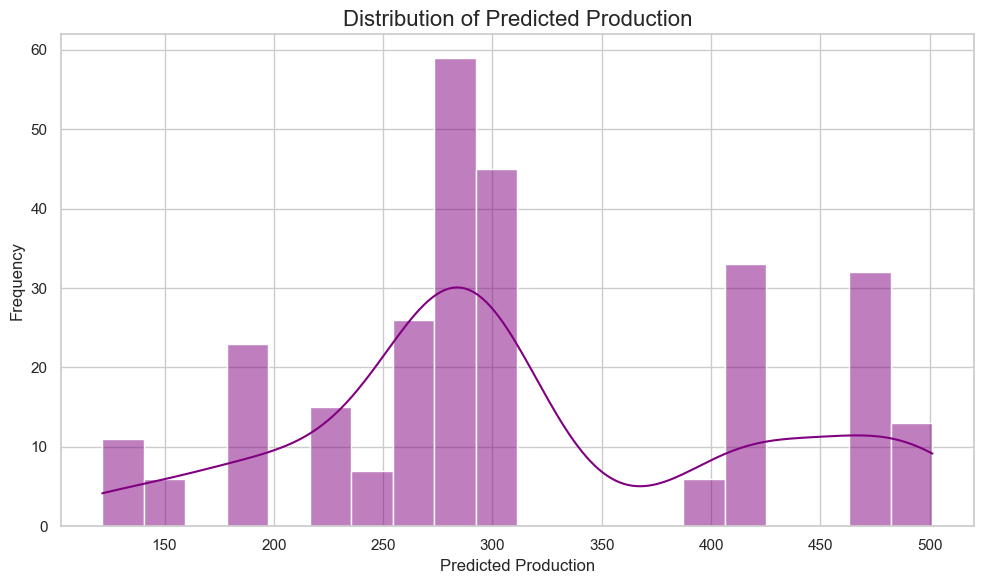

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load the dataset
data = pd.read_csv('Datasets/Final_df.csv')

# Set a consistent visual style
sns.set(style="whitegrid")

# Create a PdfPages object to save the plots
with PdfPages('crop_yield_predictions.pdf') as pdf:
    # 1. Crop-Wise Predicted Production
    plt.figure(figsize=(12, 6))
    crop_production = data.groupby('Crop')["Predicted_Production"].mean().sort_values(ascending=False)
    crop_production.plot(kind='bar', color='skyblue')
    plt.title('Average Predicted Production per Crop', fontsize=16)
    plt.ylabel('Predicted Production', fontsize=12)
    plt.xlabel('Crop', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    pdf.savefig()  # Save the current figure to the PDF
    plt.show()

    # Explanation: This bar chart shows the average predicted production for each crop. It helps identify which crops are expected to have the highest or lowest production on average.

    # 2. Cost vs. Predicted Production (Scatter Plot)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['Cost'], y=data['Predicted_Production'], hue=data['Crop'], palette='Set2', s=100)
    plt.title('Cost vs. Predicted Production', fontsize=16)
    plt.xlabel('Cost', fontsize=12)
    plt.ylabel('Predicted Production', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    pdf.savefig()  # Save the current figure to the PDF
    plt.show()

    # Explanation: This scatter plot shows the relationship between the cost incurred and the predicted production, with different colors representing different crops.

    # 3. State-Wise Total Predicted Production
    plt.figure(figsize=(12, 6))
    state_production = data.groupby('State')["Predicted_Production"].sum().sort_values(ascending=False)
    state_production.plot(kind='bar', color='lightgreen')
    plt.title('Total Predicted Production by State', fontsize=16)
    plt.ylabel('Total Predicted Production', fontsize=12)
    plt.xlabel('State', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    pdf.savefig()  # Save the current figure to the PDF
    plt.show()

    # Explanation: This bar chart illustrates the total predicted production for each state, helping to identify regions with the highest overall agricultural output.

    # 4. Duration vs. Quantity (Box Plot)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Duration in days', y='Quantity', data=data, palette='coolwarm')
    plt.title('Duration in Days vs. Quantity', fontsize=16)
    plt.xlabel('Duration in Days', fontsize=12)
    plt.ylabel('Quantity', fontsize=12)
    plt.tight_layout()
    pdf.savefig()  # Save the current figure to the PDF
    plt.show()

    # Explanation: This box plot shows the distribution of quantity for different crop durations, revealing trends and outliers.

    # 5. Predicted Production Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Predicted_Production'], kde=True, color='purple', bins=20)
    plt.title('Distribution of Predicted Production', fontsize=16)
    plt.xlabel('Predicted Production', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    pdf.savefig()  # Save the current figure to the PDF
    plt.show()

    # Explanation: This histogram with a KDE curve shows the distribution of predicted production values, indicating common production levels across all crops.
